<a href="https://colab.research.google.com/github/kozoB/TicTacToeAI/blob/main/TicTacToeClassifierCnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tic-Tac-Toe Classifier Project

In this project, I aim to recognize and classify hand-drawn Tic-Tac-Toe images using a computer vision-based CNN model. The dataset consists of separate directories containing images of hand-drawn Xs, Os, and game grids. My initial objective is to accurately identify and classify each type of drawing and ensure that the model can generalize well to new, previously unseen images.

# Import Libraries

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import layers, models
from keras.preprocessing import image_dataset_from_directory

# Load Dataset From Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

dataset_path = '/content/drive/MyDrive/Machine Learning Projects/DL Practice/TicTacToe/TicTacToe_Dataset'
dataset_dir = dataset_path

# Model Creation

This is the base model used for initial training. Experimentation and hyperparameter modifications are carried out on this model to try and achieve better results with new and better models based on this one

## Create Dataset Out Of Image Directories

In [44]:
# Load the dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    labels='inferred',  # The labels are inferred from the folder names
    label_mode='categorical',  # Multiclass classification
    batch_size=4,
    image_size=(224, 224),
    shuffle=True,  # Shuffle data before splitting
    validation_split=0.1,  # Split data into 90% train and 210% validation
    subset='both',  # Specify to load both training and validation sets
    seed=42  # Seed for reproducibility
)

Found 141 files belonging to 3 classes.
Using 127 files for training.
Using 14 files for validation.


In [45]:
# Enumerate labels
labels = []
for i, class_name in enumerate(dataset[0].class_names):
  labels.append(class_name)
  print(f"Label {i}: {class_name}")

Label 0: Grid
Label 1: O
Label 2: X


(12, 224, 224, 3) (12, 3)


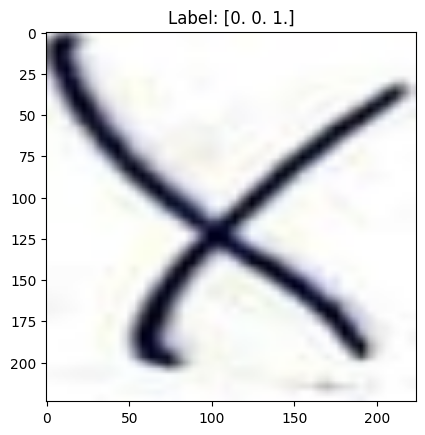

In [46]:
# Randomize the dataset and take one example
randomized_dataset = dataset[0].shuffle(buffer_size=1000).take(1)

for images, labels in randomized_dataset:
    print(images.shape, labels.shape)
    # Display an image
    import matplotlib.pyplot as plt

    plt.imshow(images[0].numpy().astype('uint8'))
    plt.title(f'Label: {labels[0]}')
    plt.show()

## Split Dataset To Train And Validation Sets

In [47]:
# Split the dataset into training and validation sets
train_set, val_set = dataset
print(train_set)
print(val_set)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>


In [48]:
class_names = train_set.class_names
print(train_set.class_names)

['Grid', 'O', 'X']


## Normalize Images

In [49]:
def normalize_image(image, label):
    # Normalize image from the range [0, 255] to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [50]:
# Apply normalization to the training and validation sets
train_set = train_set.map(normalize_image)
val_set = val_set.map(normalize_image)

## Define CNN Model Architecture

Created a CNN model with 3 Conv2D layers and 2 MaxPoolin2D layers for base model.
Input shape is 224x224x3

In [51]:
len(class_names)

3

In [52]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation='softmax')
])

Compiled the model with 'Adam' optimizer, 'categorical_crossentropy' loss function and the default learning rate

In [59]:
# Complie the model with optimizer, loss and metrices
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train The Base Model

In [60]:
history = model.fit(train_set, epochs=5, validation_data=val_set)

Epoch 1/5
11/11 [==============================] - 13s 1s/step - loss: 0.5549 - accuracy: 0.7480 - val_loss: 0.3495 - val_accuracy: 0.8571
Epoch 2/5
11/11 [==============================] - 10s 861ms/step - loss: 0.0905 - accuracy: 0.9764 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 3/5
11/11 [==============================] - 12s 985ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 4/5
11/11 [==============================] - 12s 1s/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 5/5
11/11 [==============================] - 15s 1s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.9161e-04 - val_accuracy: 1.0000


## Save The Model

In [61]:
model_path = '/content/drive/MyDrive/Machine Learning Projects/DL Practice/TicTacToe/TicTacToe_Model'
model.save(model_path)

In [62]:
import pickle

# Save the history object as a pickle file
history_path = '/content/drive/MyDrive/Machine Learning Projects/DL Practice/TicTacToe/TicTacToe_Model/history.pkl'
with open(history_path, 'wb') as f:
    pickle.dump(history.history, f)

## Load Model

In [63]:
# Load the model from Google Drive
model_path = '/content/drive/MyDrive/Machine Learning Projects/DL Practice/TicTacToe/TicTacToe_Model'
loaded_model = tf.keras.models.load_model(model_path)

In [64]:
import pickle

# Load the history from the pickle file
history_path = '/content/drive/MyDrive/Machine Learning Projects/DL Practice/TicTacToe/TicTacToe_Model/history.pkl'
with open(history_path, 'rb') as f:
    loaded_history = pickle.load(f)

# Evaluate Validation Set

In [65]:
# Evaluate the model on the validation set
val_loss, val_acc = loaded_model.evaluate(val_set)
print(f"Validation loss: {val_loss}, Validation accuracy: {val_acc}")

2/2 [==============================] - 1s 46ms/step - loss: 3.9161e-04 - accuracy: 1.0000
Validation loss: 0.0003916109853889793, Validation accuracy: 1.0


# Show And Predict Validation Set Images

1/1 [==============================] - 0s 50ms/step
Predicted class index: 0
Predicted class name: Grid
Prediction probabilities: ['1.00', '0.00', '0.00']


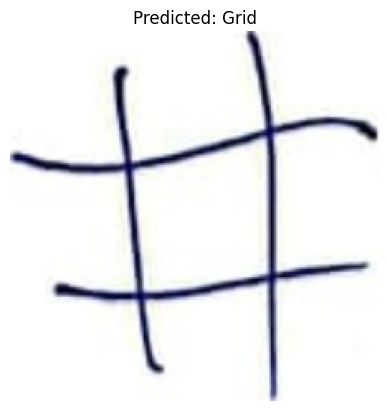

True label index: 0
True class name: Grid

--------------------------------------------------

1/1 [==============================] - 0s 38ms/step
Predicted class index: 2
Predicted class name: X
Prediction probabilities: ['0.00', '0.00', '1.00']


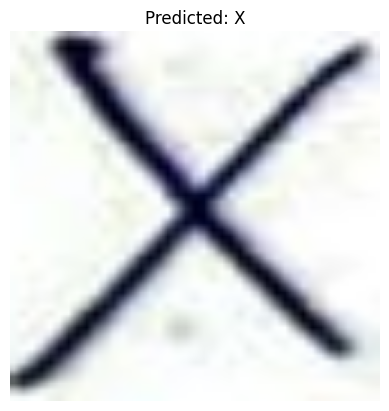

True label index: 2
True class name: X

--------------------------------------------------

1/1 [==============================] - 0s 53ms/step
Predicted class index: 2
Predicted class name: X
Prediction probabilities: ['0.00', '0.00', '1.00']


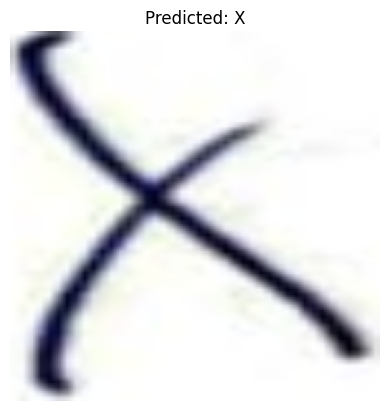

True label index: 2
True class name: X

--------------------------------------------------

1/1 [==============================] - 0s 38ms/step
Predicted class index: 2
Predicted class name: X
Prediction probabilities: ['0.00', '0.00', '1.00']


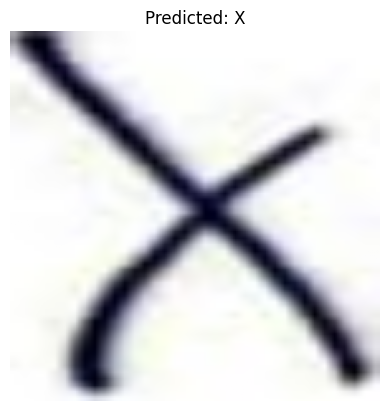

True label index: 2
True class name: X

--------------------------------------------------

1/1 [==============================] - 0s 37ms/step
Predicted class index: 2
Predicted class name: X
Prediction probabilities: ['0.00', '0.00', '1.00']


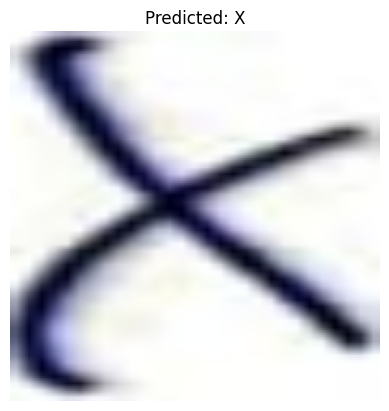

True label index: 2
True class name: X

--------------------------------------------------

1/1 [==============================] - 0s 37ms/step
Predicted class index: 1
Predicted class name: O
Prediction probabilities: ['0.00', '1.00', '0.00']


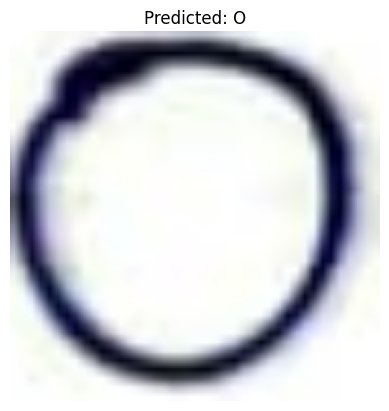

True label index: 1
True class name: O

--------------------------------------------------

1/1 [==============================] - 0s 39ms/step
Predicted class index: 2
Predicted class name: X
Prediction probabilities: ['0.00', '0.00', '1.00']


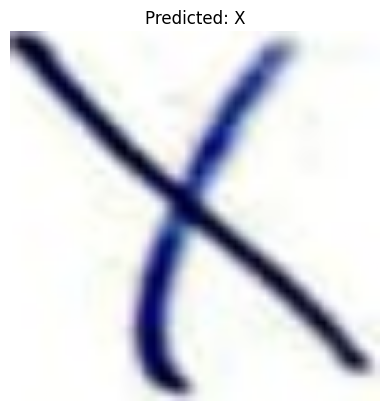

True label index: 2
True class name: X

--------------------------------------------------

1/1 [==============================] - 0s 39ms/step
Predicted class index: 2
Predicted class name: X
Prediction probabilities: ['0.00', '0.00', '1.00']


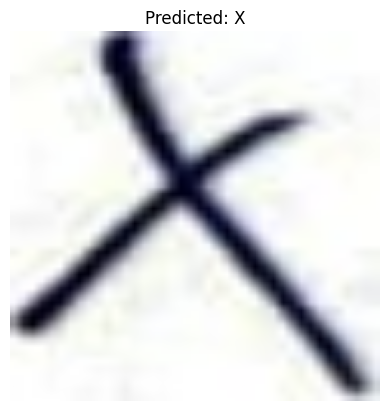

True label index: 2
True class name: X

--------------------------------------------------

1/1 [==============================] - 0s 55ms/step
Predicted class index: 0
Predicted class name: Grid
Prediction probabilities: ['1.00', '0.00', '0.00']


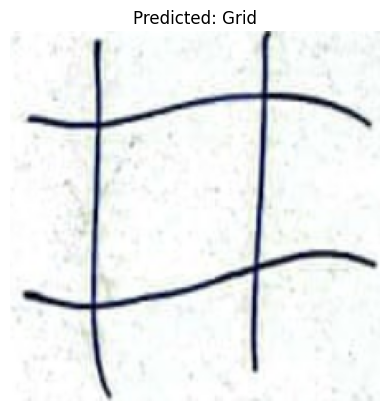

True label index: 0
True class name: Grid

--------------------------------------------------

1/1 [==============================] - 0s 38ms/step
Predicted class index: 1
Predicted class name: O
Prediction probabilities: ['0.00', '1.00', '0.00']


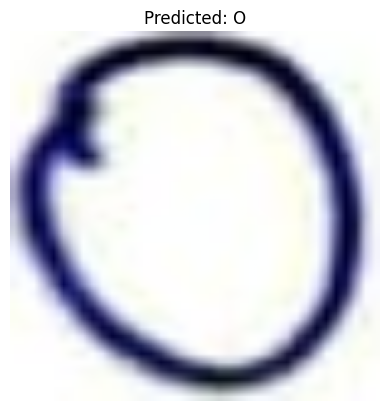

True label index: 1
True class name: O

--------------------------------------------------

1/1 [==============================] - 0s 39ms/step
Predicted class index: 2
Predicted class name: X
Prediction probabilities: ['0.00', '0.00', '1.00']


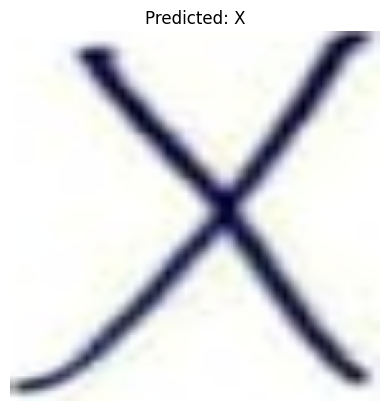

True label index: 2
True class name: X

--------------------------------------------------

1/1 [==============================] - 0s 40ms/step
Predicted class index: 0
Predicted class name: Grid
Prediction probabilities: ['1.00', '0.00', '0.00']


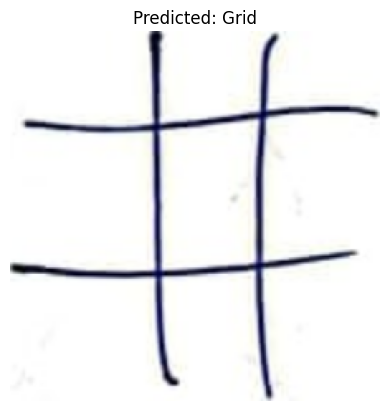

True label index: 0
True class name: Grid

--------------------------------------------------

1/1 [==============================] - 0s 38ms/step
Predicted class index: 2
Predicted class name: X
Prediction probabilities: ['0.00', '0.00', '1.00']


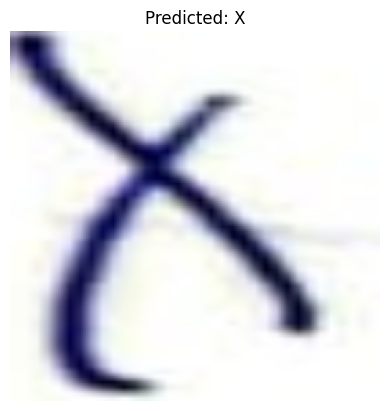

True label index: 2
True class name: X

--------------------------------------------------

1/1 [==============================] - 0s 37ms/step
Predicted class index: 2
Predicted class name: X
Prediction probabilities: ['0.00', '0.00', '1.00']


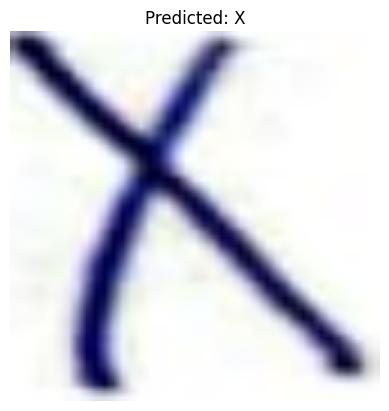

True label index: 2
True class name: X

--------------------------------------------------



In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Iterate through all batches in the validation dataset
for images, labels in val_set:
    # Iterate through each image and label in the batch
    for i in range(len(images)):
        # Take one image from the batch
        image_to_predict = images[i:i+1]  # Select one image and keep the batch dimension

        # Predict the class of the image using the trained model
        predictions = loaded_model.predict(image_to_predict)

        # Get the predicted class index with the highest probability
        predicted_class_index = tf.argmax(predictions[0]).numpy()

        # Get the predicted class name from the class_names attribute of the dataset
        predicted_class_name = class_names[predicted_class_index]

        # Print the results
        print(f"Predicted class index: {predicted_class_index}")
        print(f"Predicted class name: {predicted_class_name}")
        print(f"Prediction probabilities: {[f'{prob:.2f}' for prob in predictions[0]]}")

        # Visualize the image
        image_np = images[i].numpy()

        plt.imshow(image_np)
        plt.title(f"Predicted: {predicted_class_name}")
        plt.axis('off')  # Turn off the axes for cleaner display
        plt.show()

        # You can also print the true label and class name for comparison
        true_label = tf.argmax(labels[i]).numpy()
        true_class_name = class_names[true_label]
        print(f"True label index: {true_label}")
        print(f"True class name: {true_class_name}")

        # Add a separator line between predictions for each image
        print("\n" + "-" * 50 + "\n")


# Plot Loss And Accuracy

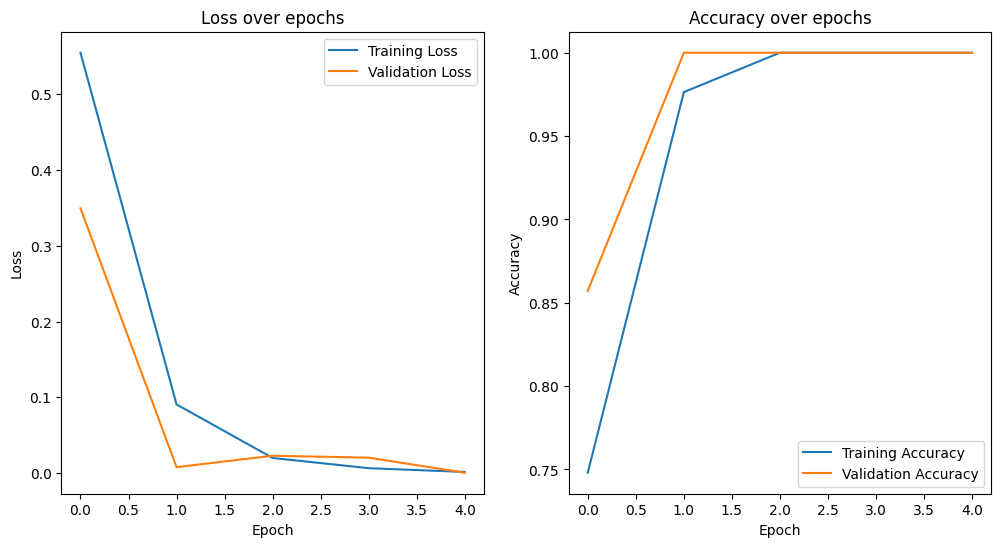

In [74]:
import matplotlib.pyplot as plt

# Plot loss and accuracy graphs for train and validation sets
def plot_history(history_dict):

    # Extract loss and accuracy for training and validation
    train_loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    train_accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    # Plotting loss graph
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over epochs')
    plt.legend()

    # Plotting accuracy graph
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()

    # Display the graphs
    plt.show()

# Call the function to plot the graphs
plot_history(loaded_history)


As the problem is easy to solve, the model converges perfectly and manages to learn with no problems, even with a small dataset

# Predict Images

Upload a new image unseen by the model, and make a prediction on it

In [ ]:
!pip install tensorflow keras pillow matplotlib

In [77]:
# Load the model from Google Drive
model_path = '/content/drive/MyDrive/Machine Learning Projects/DL Practice/TicTacToe/TicTacToe_Model'
loaded_model = tf.keras.models.load_model(model_path)

In [78]:
from PIL import Image
import numpy as np

def preprocess_image(image_path):
    # Open the image using PIL
    image = Image.open(image_path)
    # Resize the image to the input shape required by the model (e.g., 224x224)
    image = image.resize((224, 224))
    # Convert the image to a NumPy array
    image = np.array(image)
    # Normalize the image
    image = image / 255.0
    # Add a batch dimension
    image = np.expand_dims(image, axis=0)
    return image


In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
from google.colab import files

# Allow user to upload an image file
uploaded = files.upload()


Saving X_image.jpg to X_image.jpg


In [82]:
# Get the file name of the uploaded image
file_name = list(uploaded.keys())[0]

# Preprocess the image
processed_image = preprocess_image(file_name)

# Make a prediction
prediction = model.predict(processed_image)

# Get the predicted class index with the highest probability
predicted_class_index = tf.argmax(prediction[0]).numpy()

# Get the predicted class name from the class_names attribute of the dataset
predicted_class_name = class_names[predicted_class_index]

1/1 [==============================] - 0s 39ms/step
Prediction: X


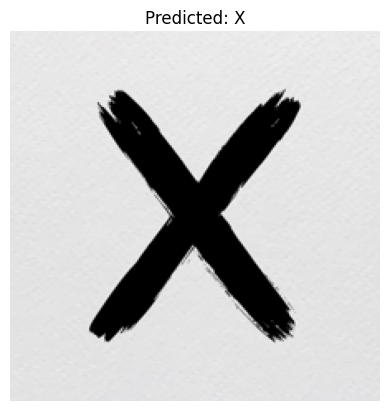

Prediction: X


In [86]:
import matplotlib.pyplot as plt

# Visualize the image
image_np = processed_image

plt.imshow(image_np[0])
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')  # Turn off the axes for cleaner display
plt.show()

# Show image, prediction and actual label
print(f'Prediction: {predicted_class_name}')

# Classify On Mobile Feed

I convert the tensorflow model to tensorflow lite for better performance on mobile devices

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Save Model As TensorFlow Lite Format

In [93]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Define the file path where the model will be saved
lite_model_path = '/content/drive/MyDrive/Machine Learning Projects/DL Practice/TicTacToe/TicTacToe_Model_Lite'
file_path = f'{lite_model_path}/model.tflite'

# Create the directory if it doesn't exist
os.makedirs(lite_model_path, exist_ok=True)

# Save the converted model to a file
with open(f'{lite_model_path}/model.tflite', 'wb') as f:
    f.write(tflite_model)

## Load TensorFlow Lite Model From Mobile Device

Load the TensorFlow Lite model on your mobile app

In [ ]:
Interpreter interpreter = new Interpreter(loadModelFile(context, "model.tflite"));